# Player Analysis

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [157]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [158]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [159]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

## Taking in conisderation only RCB VS SRH matches

In [160]:
RCB_SRH=matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Royal Challengers Bangalore'))]
RCB_SRH = RCB_SRH[RCB_SRH["dl_applied"]==0]

RCB_SRH.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


In [161]:
RCB_SRH.match_id.nunique()

13

In [162]:
RCB_SRH.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## Sandeep Sharma's Economy rate and boundaries he will give in his spell

Since we dont have sufficient data for Sandeep Sharma as a part of SRH . So, we would be considering his overall performance against RCB batsman

In [163]:
dicti = {"S Sharma":"Sandeep Sharma"}
matches["bowler"]=matches["bowler"].replace(dicti)

In [164]:
sandeep = matches[(matches["batting_team"]=="Royal Challengers Bangalore")&(matches["bowler"]=='Sandeep Sharma')]
sandeep = sandeep[(sandeep["bye_runs"]==0)&(sandeep["legbye_runs"]==0)]
sandeep.iloc[:,6:].head()

,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1684,0,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,2,1,Vishnu Vinod,AB de Villiers,Sandeep Sharma,0,0,0,0,0,0,0,0,NaN,NaN
1685,0,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,2,2,Vishnu Vinod,AB de Villiers,Sandeep Sharma,0,0,0,0,0,0,0,0,NaN,NaN
1686,0,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,2,3,Vishnu Vinod,AB de Villiers,Sandeep Sharma,0,0,0,0,0,0,0,0,NaN,NaN
1687,0,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,2,4,Vishnu Vinod,AB de Villiers,Sandeep Sharma,0,0,0,0,0,1,0,1,NaN,NaN
1688,0,Kings XI Punjab,1,Royal Challengers Bangalore,Kings XI Punjab,2,5,AB de Villiers,Vishnu Vinod,Sandeep Sharma,0,0,0,0,0,4,0,4,NaN,NaN


In [165]:
economy = sandeep.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Sandeep against RCB :")

economy

Bowling stats for Sandeep against RCB :


runs given  over  wickets taken
season match_id bowler                                         
2013   429      Sandeep Sharma          35     4              0
2014   475      Sandeep Sharma          15     3              3
       488      Sandeep Sharma          25     4              3
2015   557      Sandeep Sharma          40     4              2
       566      Sandeep Sharma          18     2              1
2016   615      Sandeep Sharma          48     4              3
       626      Sandeep Sharma          29     3              1
2017   8        Sandeep Sharma          25     4              1
       42       Sandeep Sharma          22     4              3
2018   7932     Sandeep Sharma          20     4              1
       7944     Sandeep Sharma          40     4              1
2019   11147    Sandeep Sharma          19     4              4

In [166]:
economy["economy rate"] = economy['runs given']/economy["over"]

print("Economy Rate of Sandeep while bowling against RCB :")

economy

Economy Rate of Sandeep while bowling against RCB :


runs given  over  wickets taken  economy rate
season match_id bowler                                                       
2013   429      Sandeep Sharma          35     4              0      8.750000
2014   475      Sandeep Sharma          15     3              3      5.000000
       488      Sandeep Sharma          25     4              3      6.250000
2015   557      Sandeep Sharma          40     4              2     10.000000
       566      Sandeep Sharma          18     2              1      9.000000
2016   615      Sandeep Sharma          48     4              3     12.000000
       626      Sandeep Sharma          29     3              1      9.666667
2017   8        Sandeep Sharma          25     4              1      6.250000
       42       Sandeep Sharma          22     4              3      5.500000
2018   7932     Sandeep Sharma          20     4              1      5.000000
       7944     Sandeep Sharma          40     4              1     10.000000
2019   11147    Sandeep Sharma          19     4              4      4.750000

- Boundaries

In [167]:
sandeep_boundaries = sandeep[(sandeep["batsman_runs"]==4)|(sandeep["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(sandeep_boundaries.groupby(["match_id"])["batsman_runs"].count())

boundary_runs.columns = ["boundary"]

economy = pd.merge(economy,boundary_runs,on = "match_id",how="inner")

print("Sandeep Sharma stats :")

economy

Sandeep Sharma stats :


,runs given,over,wickets taken,economy rate,boundary
match_id,,,,,
429,35,4,0,8.750000,6
475,15,3,3,5.000000,3
488,25,4,3,6.250000,4
557,40,4,2,10.000000,5
566,18,2,1,9.000000,3
615,48,4,3,12.000000,7
626,29,3,1,9.666667,5
8,25,4,1,6.250000,4
42,22,4,3,5.500000,3


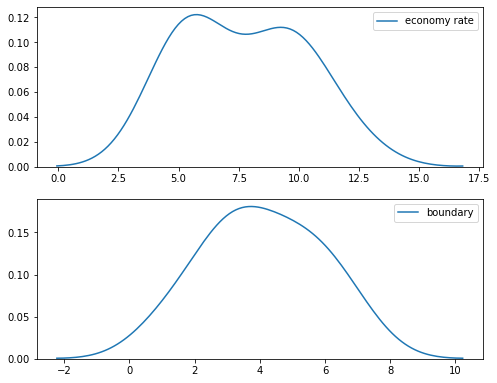

In [168]:
plt.figure(figsize = (8,10))
plt.subplot(3,1,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,1,2)
sns.kdeplot(economy["boundary"])

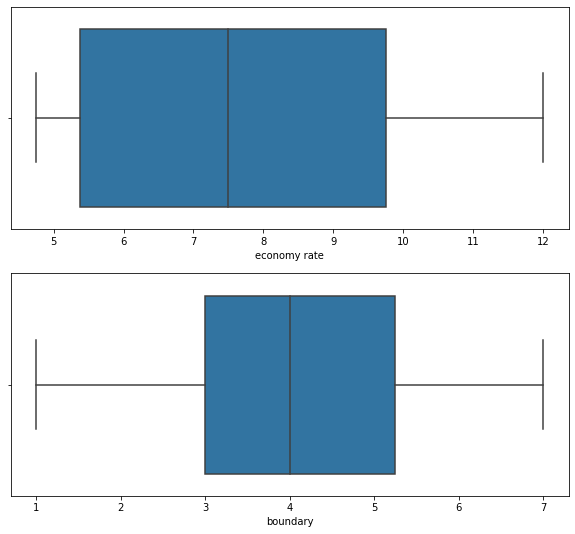

In [169]:
plt.figure(figsize = (10,9))
plt.subplot(2,1,1)
sns.boxplot(economy["economy rate"])
plt.subplot(2,1,2)
sns.boxplot(economy["boundary"])

In [170]:
economy.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
economy rate,12.0,7.680556,2.487299,4.75,5.375,7.5,9.75,12.0
boundary,12.0,4.083333,1.781640,1.00,3.000,4.0,5.25,7.0


In [171]:
print("Average economy rate of Sandeep :",round(economy["economy rate"].mean()))

Average economy rate of Sandeep : 8


In [172]:
print("Average no of boundaries given by Sandeep :",round(economy["boundary"].mean()))

Average no of boundaries given by Sandeep : 4


Text(0.5, 1.0, 'Boundaries')

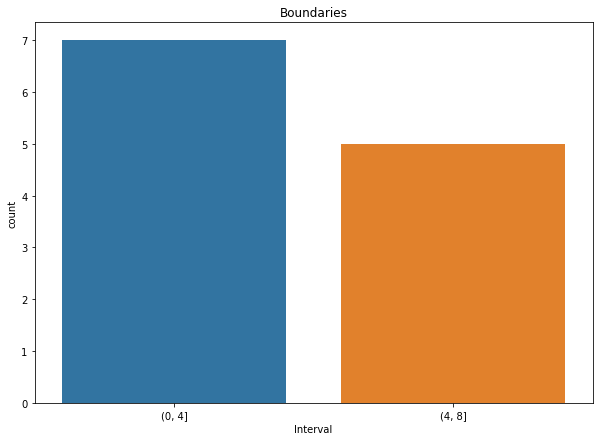

In [173]:
plt.figure(figsize=(10,7))
economy["Interval"] = pd.cut(economy["boundary"],[0,4,8])
sns.countplot(economy["Interval"])
plt.title("Boundaries")

Text(0.5, 1.0, 'Economy Rate')

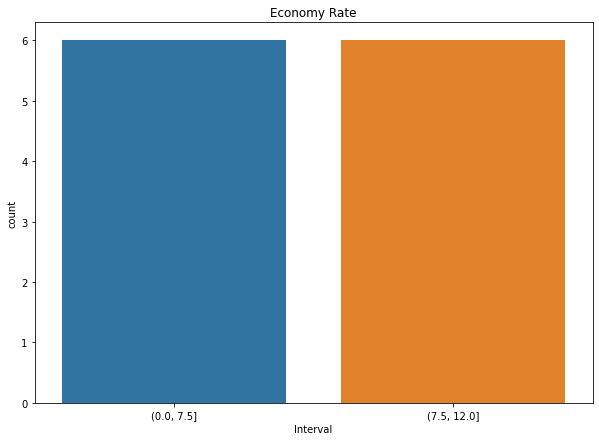

In [174]:
plt.figure(figsize=(10,7))
economy["Interval"] = pd.cut(economy["economy rate"],[0,7.5,12])
sns.countplot(economy["Interval"])
plt.title("Economy Rate")

So, from all the above analysis of Sandeep Sharma's performance against RCB's batsman we can predict that in this match the economy rate of Sandeep Sharma is expected to be 7+ and boundaries are expected to be less then 4.

## Batsman to have strike rate greater then 130

- Royal Challengers Bangalore

In [175]:
rcb = RCB_SRH[(RCB_SRH["batting_team"]=="Royal Challengers Bangalore")]

rcb = rcb[rcb["wide_runs"]==0]

rcb.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
168,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,...,0,0,0,0,0,0,0,0,NaN,NaN
169,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,8,...,0,0,0,0,0,4,0,4,NaN,NaN
170,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,8,...,0,0,0,0,0,2,0,2,NaN,NaN
171,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,8,...,0,0,0,0,0,1,0,1,NaN,NaN
172,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,8,...,0,0,0,0,0,1,0,1,NaN,NaN


- Strike rate

In [176]:
strike = rcb.groupby(["match_id","batsman"]).agg({ "batsman_runs":"sum","ball":'count'})

print("Runs scored by RCB batsman against SRH bowler :")

strike

Runs scored by RCB batsman against SRH bowler :


batsman_runs  ball
match_id batsman                              
1        A Choudhary                   6     2
         CH Gayle                     32    21
         KM Jadhav                    31    16
         Mandeep Singh                24    16
         S Aravind                     0     2
...                                  ...   ...
11345    PA Patel                      0     3
         S Hetmyer                    75    47
         UT Yadav                      9     4
         V Kohli                      16     7
         Washington Sundar             0     1

[108 rows x 2 columns]

In [177]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of RCB Batsman against SRH :")

strike

Strike Rate of RCB Batsman against SRH :


batsman_runs  ball  strike rate
match_id batsman                                           
1        A Choudhary                   6     2   300.000000
         CH Gayle                     32    21   152.380952
         KM Jadhav                    31    16   193.750000
         Mandeep Singh                24    16   150.000000
         S Aravind                     0     2     0.000000
...                                  ...   ...          ...
11345    PA Patel                      0     3     0.000000
         S Hetmyer                    75    47   159.574468
         UT Yadav                      9     4   225.000000
         V Kohli                      16     7   228.571429
         Washington Sundar             0     1     0.000000

[108 rows x 3 columns]

- Boundaries

In [178]:
rcb_boundary = rcb[(rcb["batsman_runs"]==4)|(rcb["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(rcb_boundary.groupby(["match_id","batsman"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [179]:
strike["boundary"] = boundary

strike.boundary.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary
match_id batsman                                                     
7944     V Kohli                      12    11   109.090909       2.0
11147    AB de Villiers                1     2    50.000000       0.0
         C de Grandhomme              37    32   115.625000       5.0
         M Ali                         6     8    75.000000       1.0
         Mohammed Siraj                4     8    50.000000       0.0
         P R Barman                   19    24    79.166667       2.0
         PA Patel                     11     8   137.500000       2.0
         S Dube                        5     7    71.428571       1.0
         S Hetmyer                     9     9   100.000000       1.0
         UT Yadav                     14     9   155.555556       2.0
         V Kohli                       3    10    30.000000       0.0
         YS Chahal                     1     3    33.333333       0.0
11345    AB de Villiers                1     2    50.000000       0.0
         C de Grandhomme               3     4    75.000000       0.0
         Gurkeerat Singh              67    48   139.583333       9.0
         PA Patel                      0     3     0.000000       0.0
         S Hetmyer                    75    47   159.574468      10.0
         UT Yadav                      9     4   225.000000       2.0
         V Kohli                      16     7   228.571429       3.0
         Washington Sundar             0     1     0.000000       0.0

- Fours

In [180]:
col = rcb[["match_id","batsman","batsman_runs"]]

four = col["batsman_runs"]==4

four = four.replace({False:0 , True: 1})

four = list(four)

In [181]:
col["is_four"] = four

col

,match_id,batsman,batsman_runs,is_four
125,1,CH Gayle,1,0
126,1,Mandeep Singh,0,0
127,1,Mandeep Singh,0,0
128,1,Mandeep Singh,2,0
129,1,Mandeep Singh,4,1
...,...,...,...,...
177634,11345,C de Grandhomme,1,0
177635,11345,UT Yadav,0,0
177636,11345,UT Yadav,1,0
177637,11345,UT Yadav,4,1


In [182]:
col12 = pd.DataFrame(col.groupby(["match_id","batsman"]).agg({"is_four":"sum"}))

col12

is_four
match_id batsman                   
1        A Choudhary              0
         CH Gayle                 2
         KM Jadhav                4
         Mandeep Singh            5
         S Aravind                0
...                             ...
11345    PA Patel                 0
         S Hetmyer                4
         UT Yadav                 2
         V Kohli                  2
         Washington Sundar        0

[108 rows x 1 columns]

In [183]:
four = col12["is_four"]

In [184]:
strike["fours"] = four

strike.fours.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary  fours
match_id batsman                                                            
7944     V Kohli                      12    11   109.090909       2.0      2
11147    AB de Villiers                1     2    50.000000       0.0      0
         C de Grandhomme              37    32   115.625000       5.0      3
         M Ali                         6     8    75.000000       1.0      1
         Mohammed Siraj                4     8    50.000000       0.0      0
         P R Barman                   19    24    79.166667       2.0      2
         PA Patel                     11     8   137.500000       2.0      2
         S Dube                        5     7    71.428571       1.0      1
         S Hetmyer                     9     9   100.000000       1.0      0
         UT Yadav                     14     9   155.555556       2.0      1
         V Kohli                       3    10    30.000000       0.0      0
         YS Chahal                     1     3    33.333333       0.0      0
11345    AB de Villiers                1     2    50.000000       0.0      0
         C de Grandhomme               3     4    75.000000       0.0      0
         Gurkeerat Singh              67    48   139.583333       9.0      8
         PA Patel                      0     3     0.000000       0.0      0
         S Hetmyer                    75    47   159.574468      10.0      4
         UT Yadav                      9     4   225.000000       2.0      2
         V Kohli                      16     7   228.571429       3.0      2
         Washington Sundar             0     1     0.000000       0.0      0

In [185]:
strike = strike[(strike["ball"]>10)&(strike["strike rate"]>130)&(strike["boundary"]>3)&(strike["fours"]>=2)]

strike.reset_index(inplace = True)

print("RCB batsman with strike rate greater then 130 : ")

strike

RCB batsman with strike rate greater then 130 : 


,match_id,batsman,batsman_runs,ball,strike rate,boundary,fours
0,1,CH Gayle,32,21,152.380952,5.0,2
1,1,KM Jadhav,31,16,193.750000,5.0,4
2,1,Mandeep Singh,24,16,150.000000,5.0,5
3,432,MA Agarwal,29,20,145.000000,5.0,3
4,432,V Kohli,93,47,197.872340,15.0,11
5,481,AB de Villiers,89,41,217.073171,14.0,6
6,481,CH Gayle,27,19,142.105263,5.0,3
7,503,V Kohli,67,41,163.414634,8.0,4
8,525,AB de Villiers,46,28,164.285714,7.0,5
9,525,CH Gayle,21,16,131.250000,4.0,3


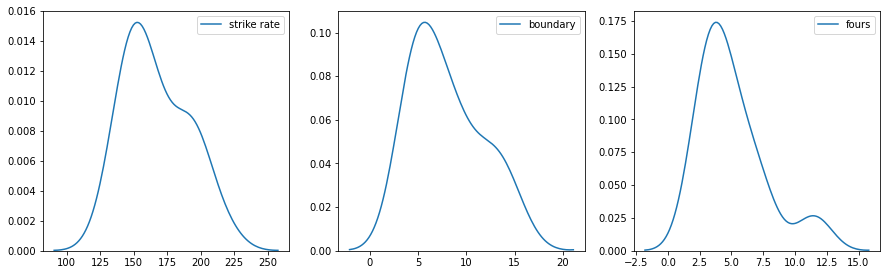

In [186]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.kdeplot(strike["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(strike["fours"])

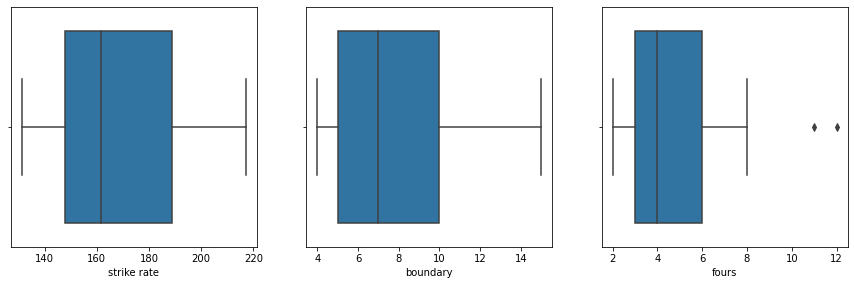

In [187]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.boxplot(strike["boundary"])
plt.subplot(3,3,3)
sns.boxplot(strike["fours"])

Text(0, 0.5, 'Count')

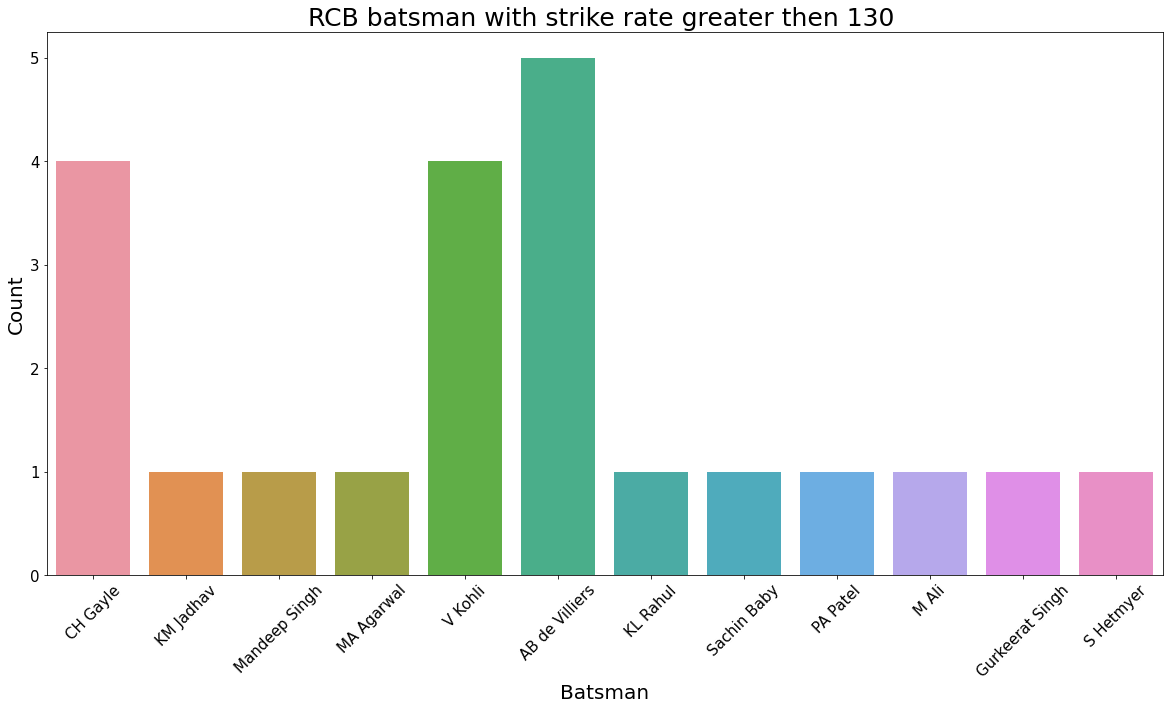

In [188]:
plt.figure(figsize = (20,10))
sns.countplot(strike["batsman"])
plt.title("RCB batsman with strike rate greater then 130 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation = 45)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Sunrisers Hyderabad

In [189]:
srh = RCB_SRH[(RCB_SRH["batting_team"]=="Sunrisers Hyderabad")]

srh = srh[srh["wide_runs"]==0]

srh.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
42,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,...,0,0,0,0,0,1,0,1,NaN,NaN
43,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,...,0,0,0,0,0,1,0,1,NaN,NaN
44,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN
45,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN
46,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN


In [190]:
strike = srh.groupby(["match_id","batsman"]).agg({ "batsman_runs":"sum","ball":'count'})

print("Runs scored by SRH batsman against RCB bowler :")

strike

Runs scored by SRH batsman against RCB bowler :


batsman_runs  ball
match_id batsman                          
1        BCJ Cutting              16     6
         DA Warner                14     8
         DJ Hooda                 16    12
         MC Henriques             52    37
         S Dhawan                 40    31
...                              ...   ...
11345    Mohammad Nabi             4     3
         Rashid Khan               1     2
         V Shankar                27    18
         WP Saha                  21    11
         YK Pathan                 3     4

[92 rows x 2 columns]

In [191]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of SRH Batsman against RCB :")

strike

Strike Rate of SRH Batsman against RCB :


batsman_runs  ball  strike rate
match_id batsman                                       
1        BCJ Cutting              16     6   266.666667
         DA Warner                14     8   175.000000
         DJ Hooda                 16    12   133.333333
         MC Henriques             52    37   140.540541
         S Dhawan                 40    31   129.032258
...                              ...   ...          ...
11345    Mohammad Nabi             4     3   133.333333
         Rashid Khan               1     2    50.000000
         V Shankar                27    18   150.000000
         WP Saha                  21    11   190.909091
         YK Pathan                 3     4    75.000000

[92 rows x 3 columns]

- Boundaries

In [192]:
srh_boundary = srh[(srh["batsman_runs"]==4)|(srh["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(srh_boundary.groupby(["match_id","batsman"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [193]:
strike["boundary"] = boundary

strike.boundary.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary
match_id batsman                                                 
7932     WP Saha                   9     5   180.000000       1.0
         YK Pathan                12     7   171.428571       2.0
7944     A Hales                  37    24   154.166667       5.0
         DJ Hooda                  1     1   100.000000       0.0
         KS Williamson            82    42   195.238095      12.0
         MK Pandey                63    38   165.789474       9.0
         S Dhawan                 18    15   120.000000       2.0
11147    DA Warner               101    55   183.636364      10.0
         J Bairstow              114    56   203.571429      19.0
         V Shankar                 9     3   300.000000       1.0
         YK Pathan                 6     6   100.000000       0.0
11345    B Kumar                   7     5   140.000000       1.0
         KS Williamson            71    43   165.116279       9.0
         MJ Guptill               30    23   130.434783       4.0
         MK Pandey                 9    12    75.000000       1.0
         Mohammad Nabi             4     3   133.333333       1.0
         Rashid Khan               1     2    50.000000       0.0
         V Shankar                27    18   150.000000       3.0
         WP Saha                  21    11   190.909091       4.0
         YK Pathan                 3     4    75.000000       0.0

- Fours

In [194]:
col = srh[["match_id","batsman","batsman_runs"]]

four = col["batsman_runs"]==4

four = four.replace({False:0 , True: 1})

four = list(four)

In [195]:
col["is_four"] = four

col

,match_id,batsman,batsman_runs,is_four
0,1,DA Warner,0,0
1,1,DA Warner,0,0
2,1,DA Warner,4,1
3,1,DA Warner,0,0
5,1,S Dhawan,0,0
...,...,...,...,...
177511,11345,KS Williamson,6,0
177512,11345,KS Williamson,4,1
177513,11345,KS Williamson,3,0
177514,11345,KS Williamson,1,0


In [196]:
col12 = pd.DataFrame(col.groupby(["match_id","batsman"]).agg({"is_four":"sum"}))

col12

is_four
match_id batsman               
1        BCJ Cutting          0
         DA Warner            2
         DJ Hooda             0
         MC Henriques         3
         S Dhawan             5
...                         ...
11345    Mohammad Nabi        1
         Rashid Khan          0
         V Shankar            0
         WP Saha              4
         YK Pathan            0

[92 rows x 1 columns]

In [197]:
four = col12["is_four"]

In [198]:
strike["fours"] = four

strike.fours.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary  fours
match_id batsman                                                        
7932     WP Saha                   9     5   180.000000       1.0      0
         YK Pathan                12     7   171.428571       2.0      2
7944     A Hales                  37    24   154.166667       5.0      2
         DJ Hooda                  1     1   100.000000       0.0      0
         KS Williamson            82    42   195.238095      12.0      7
         MK Pandey                63    38   165.789474       9.0      7
         S Dhawan                 18    15   120.000000       2.0      0
11147    DA Warner               101    55   183.636364      10.0      5
         J Bairstow              114    56   203.571429      19.0     12
         V Shankar                 9     3   300.000000       1.0      0
         YK Pathan                 6     6   100.000000       0.0      0
11345    B Kumar                   7     5   140.000000       1.0      1
         KS Williamson            71    43   165.116279       9.0      5
         MJ Guptill               30    23   130.434783       4.0      2
         MK Pandey                 9    12    75.000000       1.0      1
         Mohammad Nabi             4     3   133.333333       1.0      1
         Rashid Khan               1     2    50.000000       0.0      0
         V Shankar                27    18   150.000000       3.0      0
         WP Saha                  21    11   190.909091       4.0      4
         YK Pathan                 3     4    75.000000       0.0      0

In [199]:
strike = strike[(strike["ball"]>10)&(strike["strike rate"]>130)&(strike["boundary"]>3)&(strike["fours"]>=2)]

strike.reset_index(inplace = True)

print("SRH batsman with strike rate greater then 130 : ")

strike

SRH batsman with strike rate greater then 130 : 


,match_id,batsman,batsman_runs,ball,strike rate,boundary,fours
0,1,MC Henriques,52,37,140.540541,5.0,3
1,1,Yuvraj Singh,62,27,229.629630,10.0,7
2,432,CL White,52,34,152.941176,6.0,3
3,525,DA Warner,57,27,211.111111,10.0,6
4,525,KL Rahul,44,28,157.142857,5.0,4
5,580,A Ashish Reddy,32,18,177.777778,5.0,2
6,580,DA Warner,58,25,232.000000,9.0,4
7,580,KV Sharma,26,17,152.941176,4.0,3
8,603,DA Warner,92,50,184.000000,14.0,9
9,603,KS Williamson,50,38,131.578947,7.0,7


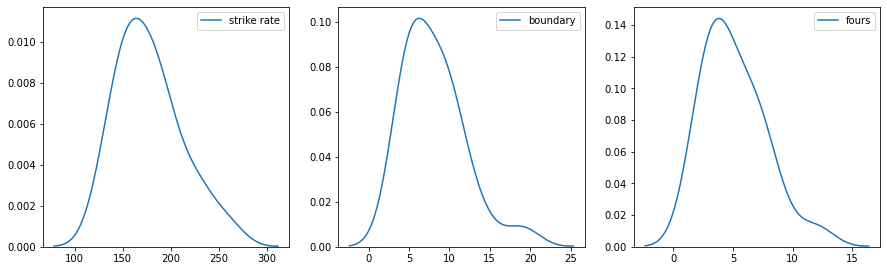

In [200]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.kdeplot(strike["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(strike["fours"])

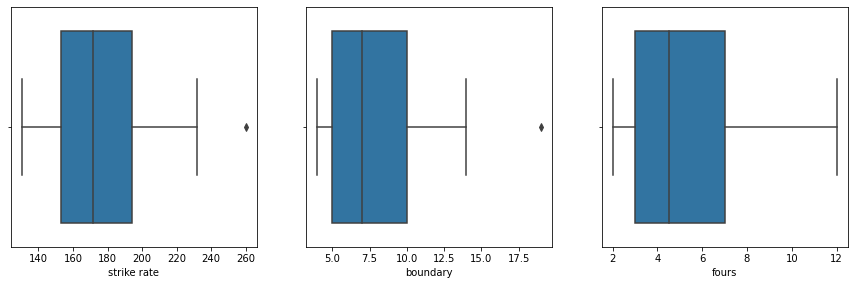

In [201]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.boxplot(strike["boundary"])
plt.subplot(3,3,3)
sns.boxplot(strike["fours"])

Text(0, 0.5, 'Count')

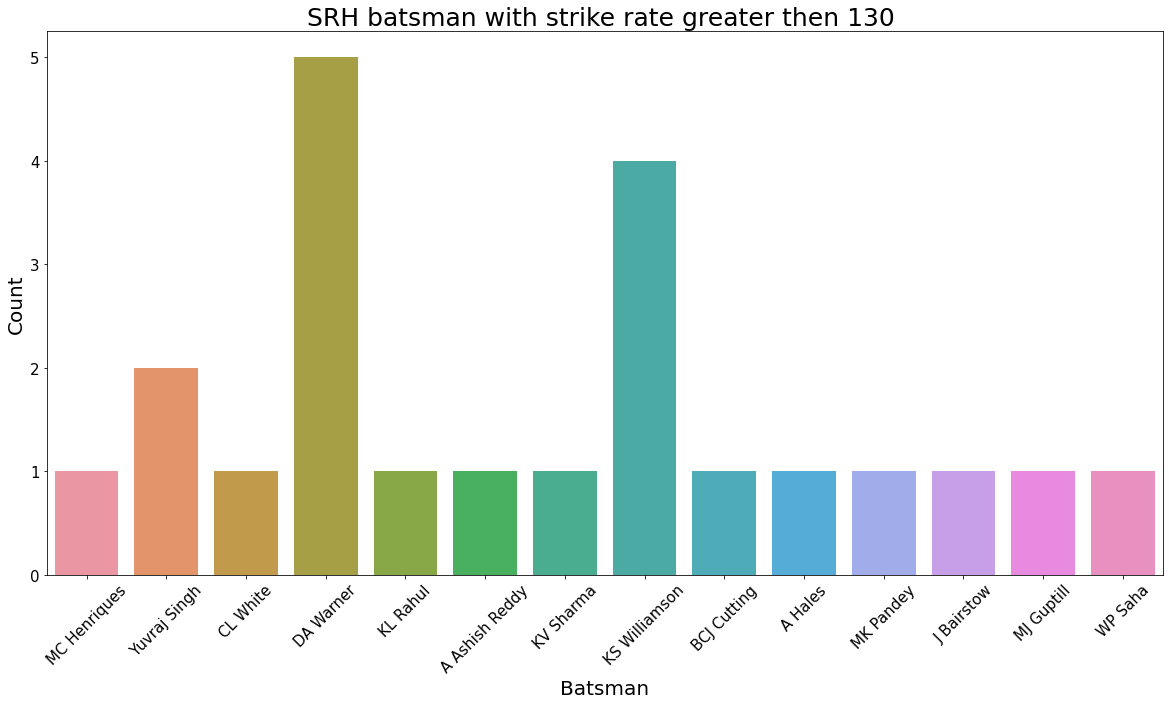

In [202]:
plt.figure(figsize = (20,10))
sns.countplot(strike["batsman"])
plt.title("SRH batsman with strike rate greater then 130 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation = 45)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

So from all the above analysis of both the team's player with 130+ strike rate and other conditions satisfied we can predict that in this match 3-4 batsman are expected to go above 130+ strike rate and satisfying all the conditions.

## Ratio

Since there can be cases that player has not played much matches against the opponent being part of the same team. So I am considering overall matches of the the player against the target opposition.

In [203]:
def ratio(player_name,opposition_team):
    
    #batsman runs
    player = matches[(matches["bowling_team"]==opposition_team)&(matches["batsman"]==player_name)]

    player_runs= player[player["wide_runs"]==0]

    batsman_runs = player_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
    
    batsman_runs.columns = ["batsman_runs","total balls"]
    
    #boundaries runs
    player_boundaries = player_runs[(player_runs["batsman_runs"]==4)|(player_runs["batsman_runs"]==6)]

    boundary_runs = pd.DataFrame(player_boundaries.groupby(["match_id"])["batsman_runs"].sum())

    boundary_runs.columns = ["boundary runs"]
    
    #runs by 1,2 and 3
    player_running = player_runs[(player_runs["batsman_runs"]==1)|(player_runs["batsman_runs"]==2)|(player_runs["batsman_runs"]==3)]

    batsman_running = pd.DataFrame(player_running.groupby(["match_id"])["batsman_runs"].sum())

    batsman_running.columns = ["running runs"]
    
    #merging the data
    final = pd.merge(batsman_runs,boundary_runs,on="match_id",how ="outer") 
    final = pd.merge(final,batsman_running,on="match_id",how ="outer")

    final["boundary runs"].fillna(0, inplace = True)
    final["running runs"].fillna(0, inplace = True)
    final["batsman_runs"].fillna(0, inplace = True)
    
    final = final[final["total balls"]>10]
    
    final["ratio"] = (final["boundary runs"]-final['running runs'])/final["batsman_runs"]
    print(final)
    print(" ")
    
    plt.figure(figsize = (25,18))
    plt.subplot(3,3,1)
    sns.kdeplot(final["ratio"])
    plt.subplot(3,3,2)
    sns.boxplot(final["ratio"])

    ratio_player = sum(final["ratio"])/len(final["ratio"])
    print("Average Ratio :",round(ratio_player,2))

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
388                 51           46           30.0          21.0  0.176471
432                 93           47           68.0          25.0  0.462366
503                 67           41           40.0          27.0  0.194030
525                 41           37           28.0          13.0  0.365854
568                 44           19           30.0          14.0  0.363636
580                 75           51           46.0          29.0  0.226667
603                 14           17            4.0          10.0 -0.428571
636                 54           35           32.0          22.0  0.185185
7932                39           30           26.0          13.0  0.333333
7944                12           11            8.0           4.0  0.333333
 
Average Ratio : 0.22


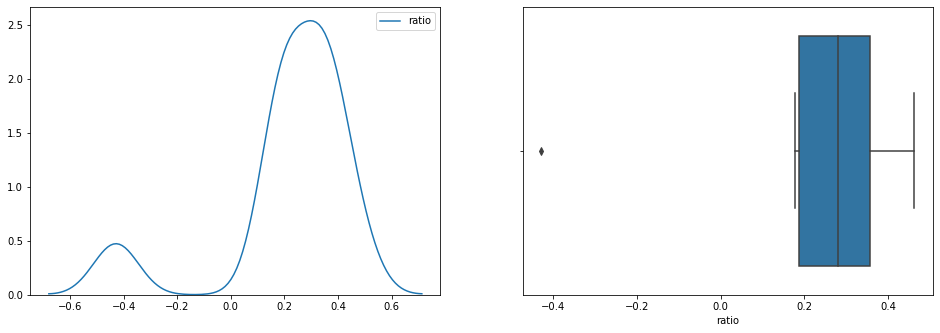

In [204]:
ratio("V Kohli","Sunrisers Hyderabad")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
7                   81           47           50.0          31.0  0.234568
53                  33           33            8.0          25.0 -0.515152
188                 40           27           24.0          16.0  0.200000
226                 16           18            8.0           8.0  0.000000
277                 59           47           34.0          25.0  0.152542
439                 29           29           10.0          19.0 -0.310345
458                 64           53           36.0          28.0  0.125000
497                 14           21            0.0          14.0 -1.000000
518                 40           24           26.0          14.0  0.300000
581                 52           29           30.0          22.0  0.153846
7916                16           11           12.0           4.0  0.500000
11310               16   

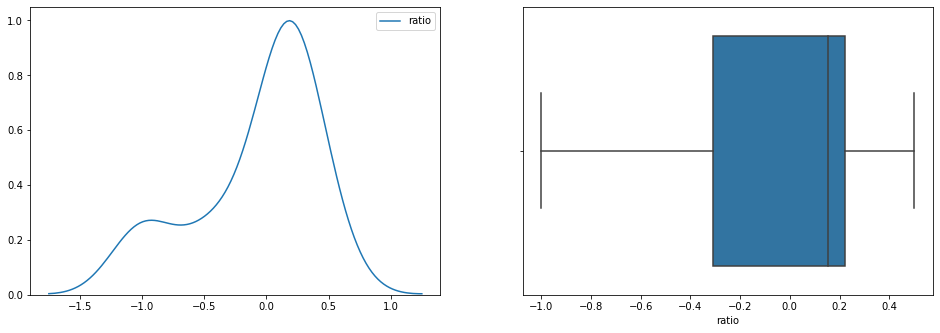

In [205]:
ratio("MK Pandey","Mumbai Indians")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
432                 15           15            6.0           9.0 -0.200000
481                 89           41           72.0          17.0  0.617978
503                 29           17           14.0          15.0 -0.034483
525                 46           28           32.0          14.0  0.391304
580                 82           42           64.0          18.0  0.560976
603                 47           32           24.0          23.0  0.021277
7944                69           39           54.0          15.0  0.565217
 
Average Ratio : 0.27


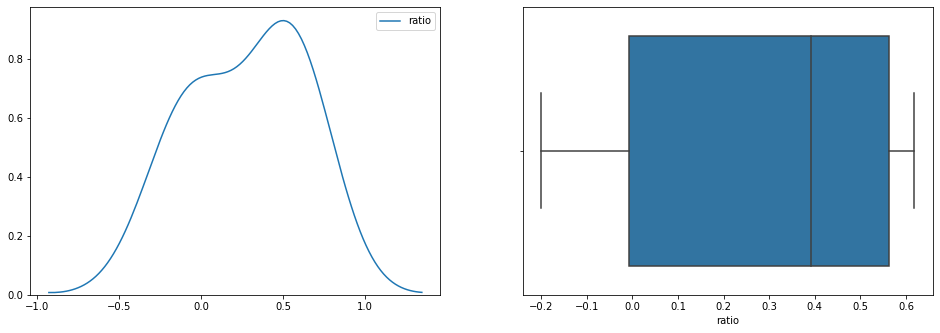

In [206]:
ratio("AB de Villiers","Sunrisers Hyderabad")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
22                  11           15            0.0          11.0 -1.000000
50                  93           55           62.0          31.0  0.333333
479                 59           47           34.0          25.0  0.152542
552                 12           12            4.0           8.0 -0.333333
619                 56           40           30.0          26.0  0.071429
7900                22           20           12.0          10.0  0.090909
11342               25           15           20.0           5.0  0.600000
 
Average Ratio : -0.01


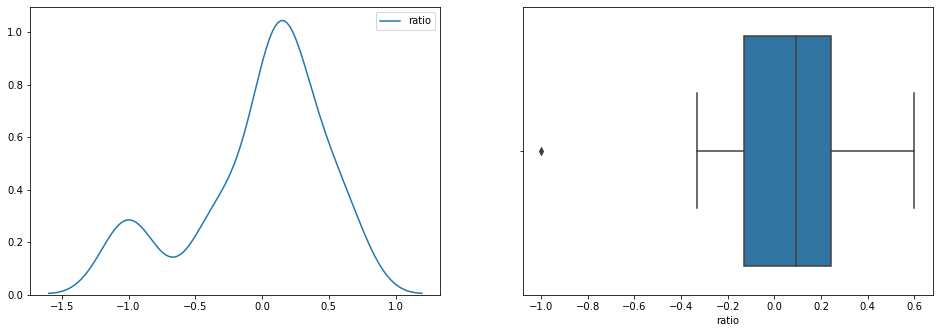

In [207]:
ratio("WP Saha","Mumbai Indians")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
10                  49           34           40.0             9  0.632653
150                 21           30            6.0            15 -0.428571
221                 31           15           26.0             5  0.677419
390                 61           37           44.0            17  0.442623
477                 65           51           28.0            37 -0.138462
493                 55           31           36.0            19  0.309091
588                 90           59           52.0            38  0.155556
613                 48           33           34.0            14  0.416667
11310               16           13            8.0             8  0.000000
 
Average Ratio : 0.23


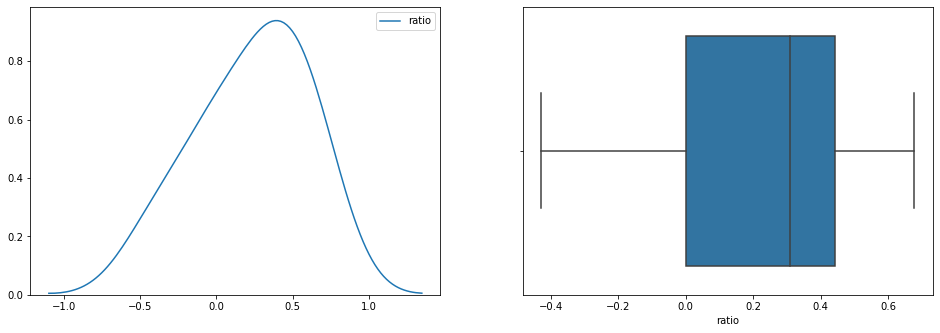

In [208]:
ratio("DA Warner","Mumbai Indians")

          batsman_runs  total balls  boundary runs  running runs    ratio
match_id                                                                 
7916                29           21           20.0             9  0.37931
 
Average Ratio : 0.38


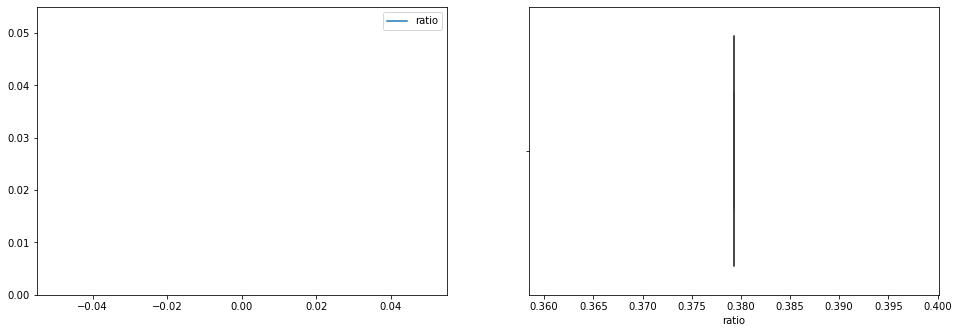

In [209]:
ratio("KS Williamson","Mumbai Indians")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
402                 16           13           12.0           4.0  0.500000
610                 51           42           18.0          33.0 -0.294118
635                 50           32           40.0          10.0  0.600000
 
Average Ratio : 0.27


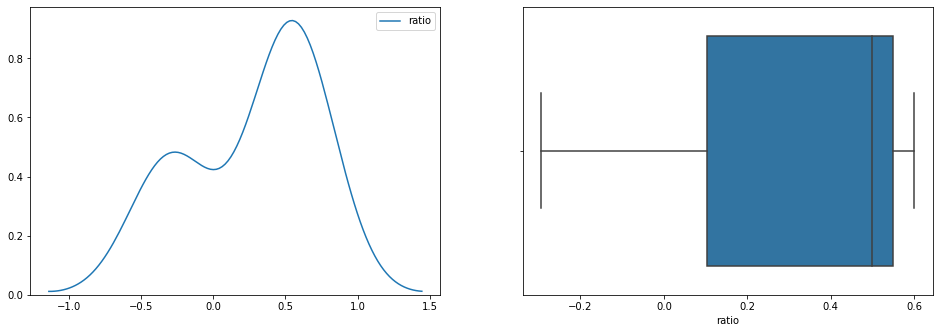

In [210]:
ratio("AJ Finch","Sunrisers Hyderabad")

          batsman_runs  total balls  boundary runs  running runs     ratio
match_id                                                                  
405                 17           12           10.0             7  0.176471
622                 27           20           16.0            11  0.185185
11345               67           48           38.0            29  0.134328
 
Average Ratio : 0.17


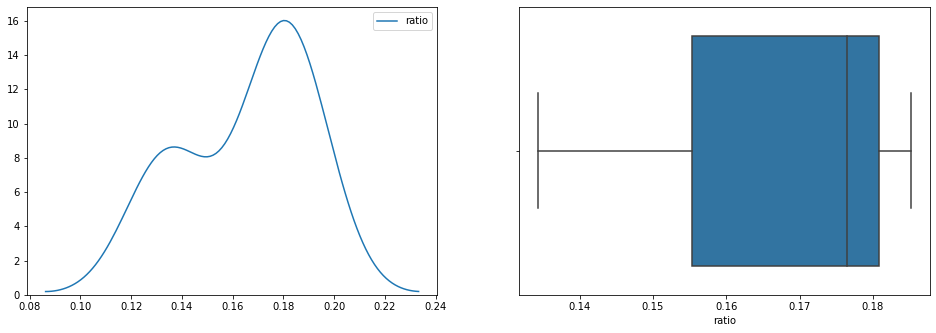

In [211]:
ratio("Gurkeerat Singh","Sunrisers Hyderabad")

So from the above calculation and plot of player's performance ratio we can predict that anyone of ABD, Warner and Williamson can have highest ratio.

## Wickets to fall in powerplay

In [212]:
overs = RCB_SRH[RCB_SRH["over"]<7]

In [213]:
overs.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

- Royal Challengers Bangalore

In [214]:
first = overs[overs["inning"]==1]

In [215]:
first_innings = pd.DataFrame(first.groupby(["match_id","batting_team"])["player_dismissed"].count())

first_innings.columns =["first inning wickets"]

first_innings.reset_index(inplace = True)

print("1st inning wickets in powerplay overs :")


first_innings

1st inning wickets in powerplay overs :


,match_id,batting_team,first inning wickets
0,1,Sunrisers Hyderabad,1
1,388,Royal Challengers Bangalore,2
2,432,Sunrisers Hyderabad,1
3,481,Sunrisers Hyderabad,2
4,503,Royal Challengers Bangalore,2
5,525,Royal Challengers Bangalore,1
6,580,Royal Challengers Bangalore,1
7,603,Sunrisers Hyderabad,1
8,636,Sunrisers Hyderabad,0
9,7932,Sunrisers Hyderabad,2


- Team-wise

In [216]:
team_wise = first_innings.groupby(["batting_team"]).agg({"batting_team":"count","first inning wickets":"sum"})

team_wise.columns = ["team count","wicket"]

print("Team wise wicket in first innings :")
team_wise

Team wise wicket in first innings :


,team count,wicket
batting_team,,
Royal Challengers Bangalore,5,8
Sunrisers Hyderabad,8,8


In [217]:
team_wise["per_match"] = round(team_wise["wicket"]/team_wise["team count"])

print("Per match wise wicket fall for both the teams in first inning :")
team_wise

Per match wise wicket fall for both the teams in first inning :


,team count,wicket,per_match
batting_team,,,
Royal Challengers Bangalore,5,8,2.0
Sunrisers Hyderabad,8,8,1.0


In [218]:
(first_innings["first inning wickets"]>1).value_counts()

False    8
True     5
Name: first inning wickets, dtype: int64

In [219]:
first_innings.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
first inning wickets,13.0,1.230769,0.725011,0.0,1.0,1.0,2.0,2.0


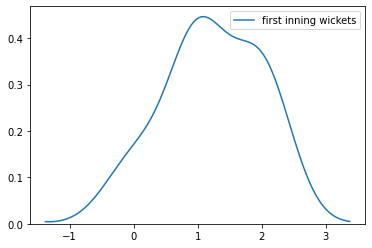

In [220]:
sns.kdeplot(first_innings["first inning wickets"])

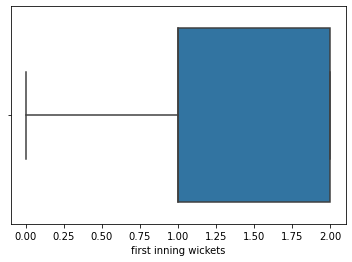

In [221]:
sns.boxplot(first_innings["first inning wickets"])

In [222]:
print("Average wicket fall in 1st innings of RCB VS SRH matches  :{}".format(round(first_innings["first inning wickets"].mean())))

Average wicket fall in 1st innings of RCB VS SRH matches  :1


- 2nd innings

In [223]:
second = overs[overs["inning"]==2]

In [224]:
second_innings = pd.DataFrame(second.groupby(["match_id","batting_team"])["player_dismissed"].count())

second_innings.columns =["second inning wickets"]

second_innings.reset_index(inplace = True)

print("2nd inning wickets in powerplay overs :")

second_innings

2nd inning wickets in powerplay overs :


,match_id,batting_team,second inning wickets
0,1,Royal Challengers Bangalore,1
1,388,Sunrisers Hyderabad,2
2,432,Royal Challengers Bangalore,1
3,481,Royal Challengers Bangalore,2
4,503,Sunrisers Hyderabad,0
5,525,Sunrisers Hyderabad,0
6,580,Sunrisers Hyderabad,1
7,603,Royal Challengers Bangalore,1
8,636,Royal Challengers Bangalore,0
9,7932,Royal Challengers Bangalore,1


- Team-wise

In [225]:
team_wise = second_innings.groupby(["batting_team"]).agg({"batting_team":"count","second inning wickets":"sum"})

team_wise.columns = ["team count","wicket"]

print("Team wise wicket in second innings :")
team_wise

Team wise wicket in second innings :


,team count,wicket
batting_team,,
Royal Challengers Bangalore,8,12
Sunrisers Hyderabad,5,4


In [226]:
team_wise["per_match"] = round(team_wise["wicket"]/team_wise["team count"])

print("Per match wise wicket fall for both the teams in second inning :")
team_wise

Per match wise wicket fall for both the teams in second inning :


,team count,wicket,per_match
batting_team,,,
Royal Challengers Bangalore,8,12,2.0
Sunrisers Hyderabad,5,4,1.0


In [227]:
(second_innings["second inning wickets"]>1).value_counts()

False    9
True     4
Name: second inning wickets, dtype: int64

In [228]:
second_innings.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
second inning wickets,13.0,1.230769,1.012739,0.0,1.0,1.0,2.0,3.0


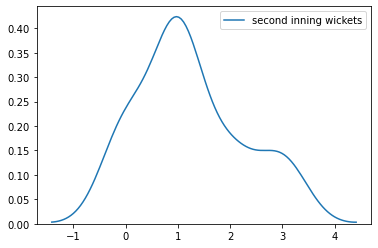

In [229]:
sns.kdeplot(second_innings["second inning wickets"])

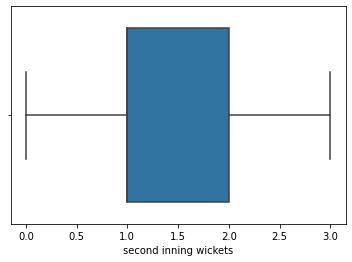

In [230]:
sns.boxplot(second_innings["second inning wickets"])

In [231]:
print("Average wicket fall in 2nd innings of RCB VS SRH matches  :{}".format(round(second_innings["second inning wickets"].mean())))

Average wicket fall in 2nd innings of RCB VS SRH matches  :1


- Overall

In [232]:
wickets = pd.DataFrame(overs.groupby(['match_id'])["player_dismissed"].count())

wickets.columns = ["wickets"]

print("Wicket fall in powerplay :")

wickets

Wicket fall in powerplay :


,wickets
match_id,
1,2
388,4
432,2
481,4
503,2
525,1
580,2
603,2
636,0


In [233]:
wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets,13.0,2.461538,1.198289,0.0,2.0,2.0,3.0,4.0


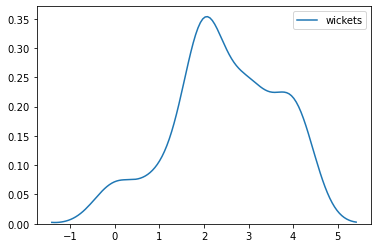

In [234]:
sns.kdeplot(wickets['wickets'])

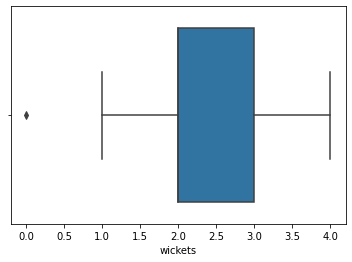

In [235]:
sns.boxplot(wickets['wickets'])

In [236]:
print("Average wicket fall in RCB VS SRH matches  :{}".format(round(wickets["wickets"].mean())))

Average wicket fall in RCB VS SRH matches  :2


Text(0.5, 1.0, 'Wicket fall in 1st innings')

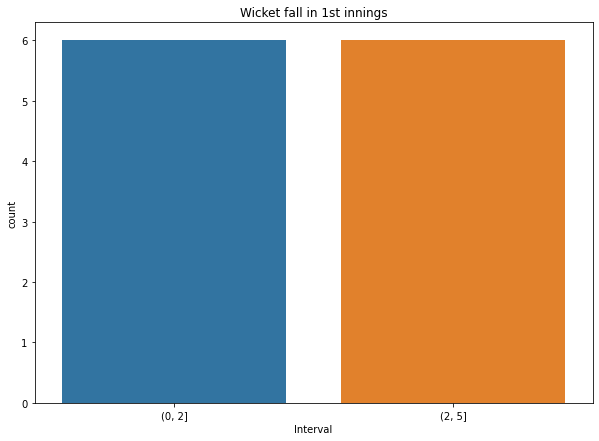

In [237]:
plt.figure(figsize=(10,7))
wickets["Interval"] = pd.cut(wickets["wickets"],[0,2,5])
sns.countplot(wickets["Interval"])
plt.title("Wicket fall in 1st innings")

So from all the above analysis both inning wise and overall , we can predict that 3-4 wickets are expected to fall in powerplay if RCB bats in 2nd innings and similarly if SRH bats in 2nd inning then around 2 wickets are expected to fall in the match accourding to previous performance of both the teams under light.  